<a href="https://colab.research.google.com/github/skmyngo/ITB2022/blob/main/%EB%B6%84%EB%A5%98%EA%B3%BC%EC%A0%9C_2111479_%EC%A1%B0%EB%AF%BC%EC%A3%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install mglearn 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 540 kB 7.3 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582637 sha256=ee8d105869ade15299faacfa912a09aa82adb4d2db87ea01b5fae6820266138b
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


In [2]:
!pip install --upgrade joblib==1.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 306 kB 8.2 MB/s 
  Attempting uninstall: joblib
    Found existing installation: joblib 1.2.0
    Uninstalling joblib-1.2.0:
      Successfully uninstalled joblib-1.2.0


In [3]:
import mglearn

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
%matplotlib inline
import pandas as pd
import seaborn as sns           # Seaborn 로딩하기
import matplotlib.pyplot as plt

In [17]:
wisc = pd.read_csv("/content/drive/My Drive/Colab Notebooks/ITB/health_data.csv")

print(wisc.columns)
display(wisc.info())      # 569행의 데이터 - id는 index이므로 생략됨, diagnosis와 30개 변수 (결측치 없음)  
display(wisc.head()) 

Index(['SIDO', 'SEX', 'AGE_GROUP', 'HEIGHT', 'WEIGHT', 'BP_HIGH', 'BP_LWST',
       'BLDS', 'TOT_CHOLE', 'TRIGLYCERIDE', 'HDL_CHOLE', 'LDL_CHOLE', 'HMG',
       'OLIG_PROTE_CD', 'CREATININE', 'SGOT_AST', 'SGPT_ALT', 'GAMMA_GTP',
       'SMK', 'DRK', 'height(m)', 'HEIGHT*2', 'BMI'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4043 entries, 0 to 4042
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SIDO           4043 non-null   int64  
 1   SEX            4043 non-null   int64  
 2   AGE_GROUP      4043 non-null   int64  
 3   HEIGHT         4043 non-null   int64  
 4   WEIGHT         4043 non-null   int64  
 5   BP_HIGH        4043 non-null   int64  
 6   BP_LWST        4043 non-null   int64  
 7   BLDS           4043 non-null   int64  
 8   TOT_CHOLE      4043 non-null   int64  
 9   TRIGLYCERIDE   4043 non-null   int64  
 10  HDL_CHOLE      4043 non-null   float64
 11  LDL_CHOLE  

None

,SIDO,SEX,AGE_GROUP,HEIGHT,WEIGHT,BP_HIGH,BP_LWST,BLDS,TOT_CHOLE,TRIGLYCERIDE,...,OLIG_PROTE_CD,CREATININE,SGOT_AST,SGPT_ALT,GAMMA_GTP,SMK,DRK,height(m),HEIGHT*2,BMI
0,36,0,9,165,60,127,79,90,188,58,...,1.0,1.1,21,27,21,0,0,1.65,2.7225,22.038567
1,41,1,12,155,50,144,89,110,220,171,...,1.0,0.7,18,17,14,0,0,1.55,2.4025,20.811655
2,27,0,9,185,85,114,72,86,234,183,...,1.0,1.1,25,32,26,1,1,1.85,3.4225,24.835646
3,44,0,9,165,80,112,73,250,119,265,...,1.0,0.7,18,20,35,1,1,1.65,2.7225,29.384757
4,41,1,17,150,50,136,65,104,177,61,...,1.0,0.7,42,48,39,0,0,1.50,2.2500,22.222222


In [18]:
wisc.describe() 

,SIDO,SEX,AGE_GROUP,HEIGHT,WEIGHT,BP_HIGH,BP_LWST,BLDS,TOT_CHOLE,TRIGLYCERIDE,...,OLIG_PROTE_CD,CREATININE,SGOT_AST,SGPT_ALT,GAMMA_GTP,SMK,DRK,height(m),HEIGHT*2,BMI
count,4043.000000,4043.000000,4043.000000,4043.000000,4043.000000,4043.000000,4043.000000,4043.000000,4043.000000,4043.000000,...,4022.000000,4043.000000,4043.000000,4043.000000,4043.000000,4043.000000,4043.000000,4043.000000,4043.000000,4043.000000
mean,33.824388,0.498887,11.950037,160.822409,62.794954,124.639377,76.490972,103.751422,198.266139,132.813752,...,1.125559,0.856913,27.898837,26.924808,38.135296,0.364333,0.572842,1.608224,2.594850,24.160125
std,12.550239,0.500061,2.283252,9.201689,12.197016,14.739803,9.840721,24.309470,41.950654,92.928160,...,0.503060,0.367349,18.261743,22.801052,57.009290,0.481302,0.494727,0.092017,0.296417,3.491896
min,11.000000,0.000000,9.000000,130.000000,30.000000,78.000000,50.000000,58.000000,70.000000,14.000000,...,1.000000,0.050000,5.000000,2.000000,3.000000,0.000000,0.000000,1.300000,1.690000,14.268728
25%,27.000000,0.000000,10.000000,155.000000,55.000000,114.000000,70.000000,91.000000,169.000000,77.000000,...,1.000000,0.700000,20.000000,16.000000,16.000000,0.000000,0.000000,1.550000,2.402500,22.038567
50%,41.000000,0.000000,12.000000,160.000000,60.000000,124.000000,77.000000,99.000000,197.000000,111.000000,...,1.000000,0.800000,24.000000,21.000000,24.000000,0.000000,1.000000,1.600000,2.560000,23.875115
75%,44.000000,1.000000,13.000000,170.000000,70.000000,134.000000,82.000000,109.000000,225.000000,160.000000,...,1.000000,1.000000,30.000000,31.000000,38.000000,1.000000,1.000000,1.700000,2.890000,26.122449
max,49.000000,1.000000,18.000000,195.000000,120.000000,199.000000,130.000000,473.000000,387.000000,1701.000000,...,6.000000,9.200000,484.000000,477.000000,976.000000,1.000000,1.000000,1.950000,3.802500,39.792388


1    2316
0    1727
Name: DRK, dtype: int64


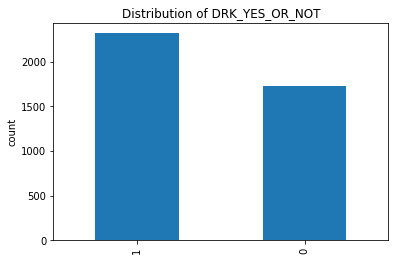

In [19]:
print(wisc['DRK'].value_counts())

wisc['DRK'].value_counts().plot.bar()
plt.ylabel('count')
plt.title('Distribution of DRK_YES_OR_NOT')
plt.show()
#1=YES, 0=NO

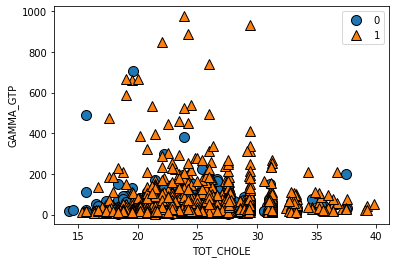

In [21]:
mglearn.discrete_scatter(wisc['BMI'], wisc['GAMMA_GTP'], wisc['DRK'])
plt.xlabel("TOT_CHOLE")
plt.ylabel("GAMMA_GTP")
plt.legend()
plt.show()

In [63]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X = wisc.iloc[:, 3:10]  # 30개 변수 
y = wisc['DRK']   # target 변수 diagnosis 

# 데이터셋을 학습(train)과 테스트(test) 세트로 분할
# random_state : random 으로 분할시 사용되는 난수 seed 숫자
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify=y, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

tree = DecisionTreeClassifier(random_state=0)  
tree.fit(X_train, y_train)
print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))

학습용 데이터 정확도: 1.000
시험용 데이터 정확도: 0.565


In [64]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))

학습용 데이터 정확도: 0.686
시험용 데이터 정확도: 0.648


In [81]:
from sklearn.tree import export_graphviz
import graphviz

# filled = True: 색상의 진하기로 클래스를 나타냄, impurity: 불순도 계산값 보여주기 옵션
export_graphviz(tree, out_file="tree.dot", class_names=[ "0", "1"],
                feature_names=wisc.columns[1:], impurity=False, filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

TypeError: ignored

In [78]:
result = tree.feature_importances_
print("변수의 중요도:\n", result)

AttributeError: ignored

In [77]:
res = pd.DataFrame(result)
res["name"] = health.columns[0:]
display(res.info())

# perimeter_worst의 비중이 가장 큼, 루트 노드에서 이 값부터 사용 
display(res.sort_values(by='name'))  

NameError: ignored